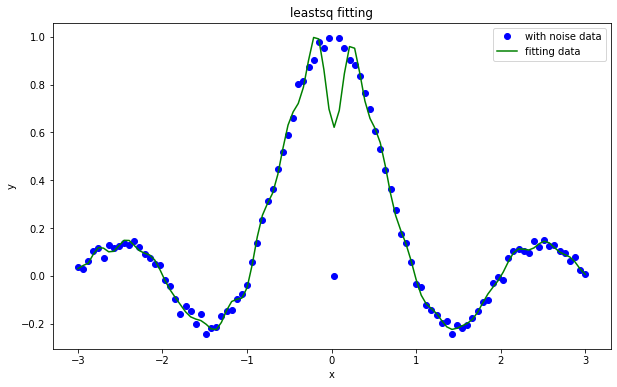

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def func(x):
    # 原始函数
    return np.sin(np.pi*x)/(np.pi*x)


def funk(x):
    hh = 2 *0.3**2
    K = np.zeros((len(x),len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            K[i,j] +=np.exp(-(x[i]-x[j])**2/hh)
    return K


x = np.linspace(-3,3,100)
y0 = func(x)

#加入噪声之后的实验数据
np.random.seed(0)    #保证每次生成的随机数是一样的
y1 = y0 + 0.02 * np.random.randn(len(x))
y1[50] = 0 # 异常值点

K = funk(x)

theta = np.dot(np.linalg.pinv(np.dot(K,K.T)),np.dot(K,y1))

y2 = np.dot(K,theta)

#绘图
plt.figure(figsize=(10,6))
#plt.plot(x, y0,'y-', label="real data")          #绘制真实数据
plt.plot(x, y1,"bo", label="with noise data")    #绘制带有噪声数据
plt.plot(x, y2,"g-", label="fitting data")       #绘制拟合函数

plt.title('leastsq fitting')                 #添加标题
plt.xlabel('x')                              #x轴名称
plt.ylabel('y')                              #y轴名称
plt.legend()                                 #添加图例
plt.show()                                   #显示图像